In [53]:
#Code automatically given by FCC in order to import necessarry libraries and modules
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files (Code automatically given by FCC in order to prepare data directories for training, validation and test datasets)
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [149]:
#Experimental cell for checking directory structure of cats_and_dogs
total_train

2001

In [150]:
# 3 (First cell with own code for loading data generators for image augmentation for train, validation and test datasets)
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', batch_size=batch_size)
val_data_gen = validation_image_generator.flow_from_directory(validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', batch_size=batch_size)
test_data_gen = test_image_generator.flow_from_directory('cats_and_dogs', target_size=(IMG_HEIGHT, IMG_WIDTH), classes=['test'], class_mode=None, batch_size=batch_size, shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


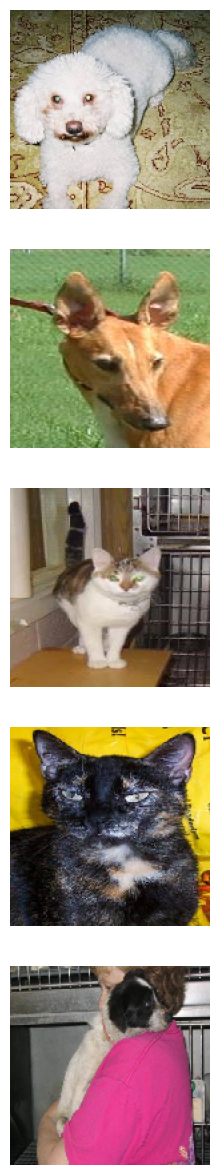

In [151]:
# 4 (Code automatically given by FCC for seeing if train_data_gen was created correctly by returning a set of 5 random training images)
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [166]:
# 5 (Second cell with own code for creating a new version of train_image_generator with 5 random image transformations and image rescaling from 0-255 to 0-1)
train_image_generator = ImageDataGenerator(rescale=1./255, rotation_range=25, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)


Found 2000 images belonging to 2 classes.


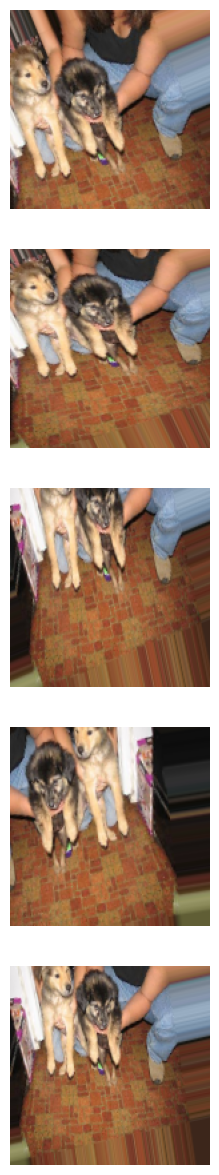

In [167]:
# 6 (Code automatically given by FCC in order to plot a single training set image 5 times with different variations of the image transformations defined previously)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [168]:
train_data_gen[0]

(array([[[[8.12173784e-01, 5.30366302e-01, 3.74185264e-01],
          [8.05668354e-01, 5.24077415e-01, 3.64166498e-01],
          [7.98481107e-01, 5.17788589e-01, 3.54284048e-01],
          ...,
          [9.48856235e-01, 9.33224440e-01, 8.86002243e-01],
          [9.37559187e-01, 9.21872914e-01, 9.09195602e-01],
          [9.33481753e-01, 9.25341904e-01, 9.36216712e-01]],
 
         [[8.22906971e-01, 5.55410206e-01, 4.17117745e-01],
          [8.20211709e-01, 5.49121439e-01, 4.06336933e-01],
          [8.17516565e-01, 5.42832613e-01, 3.95556092e-01],
          ...,
          [9.46694434e-01, 9.31008101e-01, 8.90925109e-01],
          [9.36526775e-01, 9.22296882e-01, 9.14901078e-01],
          [9.31970954e-01, 9.25490260e-01, 9.35211301e-01]],
 
         [[8.30269814e-01, 5.70343614e-01, 4.33088690e-01],
          [8.28473091e-01, 5.66749990e-01, 4.29495066e-01],
          [8.26676250e-01, 5.63156366e-01, 4.25901473e-01],
          ...,
          [9.44205701e-01, 9.28519428e-01, 8.9590

In [169]:
# 7
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))









model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     4,735,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,791,425 (18.28 MB)

 Trainable params: 4,791,425 (18.28 MB)

 Non-trainable params: 0 (0.00 B)

In [170]:
model.compile(optimizer='rmsprop', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [172]:
# 8
history = model.fit(train_data_gen, steps_per_epoch=int(total_train/batch_size), epochs=epochs, validation_data=val_data_gen, validation_steps=int(total_val/batch_size))

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 104s 7s/step - accuracy: 0.6151 - loss: 0.6563 - val_accuracy: 0.6775 - val_loss: 0.6101
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7422 - loss: 0.5778 - val_accuracy: 0.6875 - val_loss: 0.5944
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 117s 7s/step - accuracy: 0.6161 - loss: 0.6675 - val_accuracy: 0.6038 - val_loss: 0.6294
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 860ms/step - accuracy: 0.5938 - loss: 0.6344 - val_accuracy: 0.6641 - val_loss: 0.6102
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 142s 8s/step - accuracy: 0.6594 - loss: 0.6101 - val_accuracy: 0.6763 - val_loss: 0.5940
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6953 - loss: 0.5903 - val_accuracy: 0.6908 - val_loss: 0.5770
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 99s 7s/step - accuracy: 0.6681 - loss: 0.6133 - val_accuracy: 0.6674 - val_loss: 0.5944
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 863ms/step - accuracy: 0.6797 - loss: 0.5760 - val_accuracy: 0.6752 - 

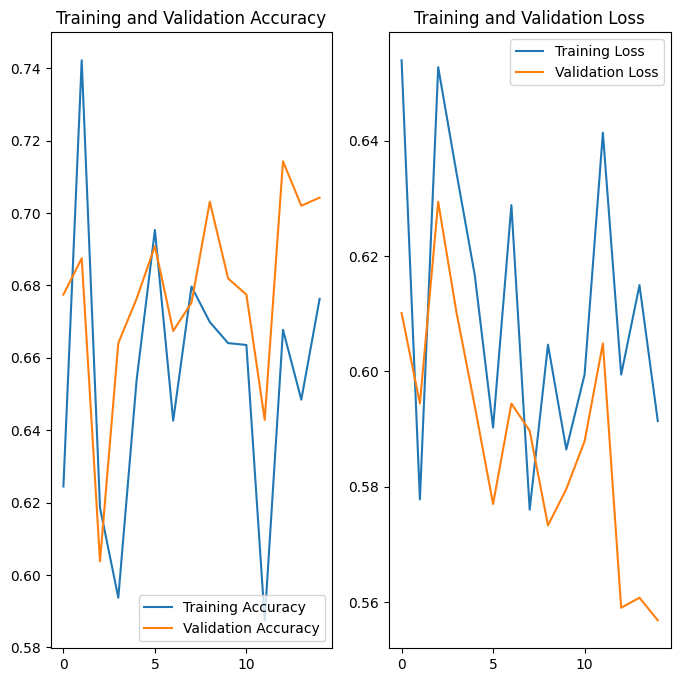

In [173]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [174]:
probabilities = model.predict(test_data_gen) #Generate predictions for test data
type(probabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


numpy.ndarray

In [175]:
probabilities = probabilities.reshape(-1) #Reshape probabilities into a 1D array in order to turn it into a list of integers below
print(probabilities)

[0.45623907 0.33048657 0.05106887 0.7748322  0.59244794 0.40884137
 0.63845634 0.28170678 0.42501047 0.9679132  0.22289878 0.540925
 0.33363706 0.2723274  0.48922023 0.6373093  0.56187475 0.8715903
 0.52809787 0.6125429  0.17279018 0.4847916  0.3947133  0.44110563
 0.52125293 0.33965808 0.4464246  0.31671968 0.30359796 0.6614265
 0.34492272 0.10720527 0.75715756 0.9998773  0.16660255 0.7804687
 0.9961582  0.5975882  0.32517436 0.54140335 0.43393162 0.47363183
 0.9070539  0.5301168  0.30054802 0.41911575 0.48658776 0.2561917
 0.2541738  0.19446595]


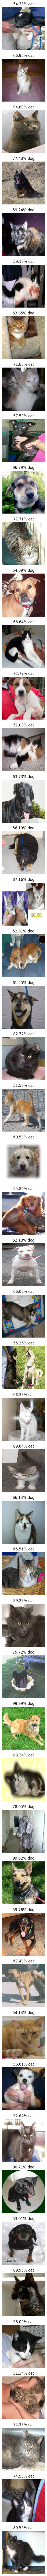

In [176]:
#probabilities = probabilities.round()
probabilities = probabilities.tolist() #Turn probabilities into a list so plotImages can work correctly
plotImages(test_data_gen[0], probabilities=probabilities)

In [177]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
